<a href="https://colab.research.google.com/github/sztahodavid/humanaicourse/blob/main/gensim_word2vec_hu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://lsa.tmit.bme.hu/files/wiki_train_doc2vec_text.txt

--2024-11-24 14:31:46--  http://lsa.tmit.bme.hu/files/wiki_train_doc2vec_text.txt
Resolving lsa.tmit.bme.hu (lsa.tmit.bme.hu)... 152.66.246.99
Connecting to lsa.tmit.bme.hu (lsa.tmit.bme.hu)|152.66.246.99|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243973232 (233M) [text/plain]
Saving to: ‘wiki_train_doc2vec_text.txt’

wiki_train_doc2vec_ 100%[===================>] 232.67M  15.4MB/s    in 26s     

2024-11-24 14:32:13 (8.98 MB/s) - ‘wiki_train_doc2vec_text.txt’ saved [243973232/243973232]



In [2]:
!pwd

/content


In [3]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('/content/wiki_train_doc2vec_text.txt')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [4]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences)

In [5]:
for w in model.wv.most_similar(positive=['király'], topn=20):
  print(w)

('királynak', 0.8181234002113342)
('királyt', 0.7775059938430786)
('királlyal', 0.7363395690917969)
('királyné', 0.7328608632087708)
('trón', 0.7321446537971497)
('herceg', 0.7311689853668213)
('királynő', 0.7261713147163391)
('ulászló', 0.7230981588363647)
('uralkodó', 0.7225279808044434)
('császár', 0.7140315175056458)
('trónt', 0.7107931971549988)
('henrik', 0.7034367918968201)
('királyhoz', 0.7001134157180786)
('fejedelem', 0.6880127787590027)
('királyok', 0.6880125403404236)
('ferdinánd', 0.6828311681747437)
('eduárd', 0.6816288232803345)
('királyként', 0.6581994295120239)
('királlyá', 0.6560035347938538)
('szultán', 0.6530560851097107)


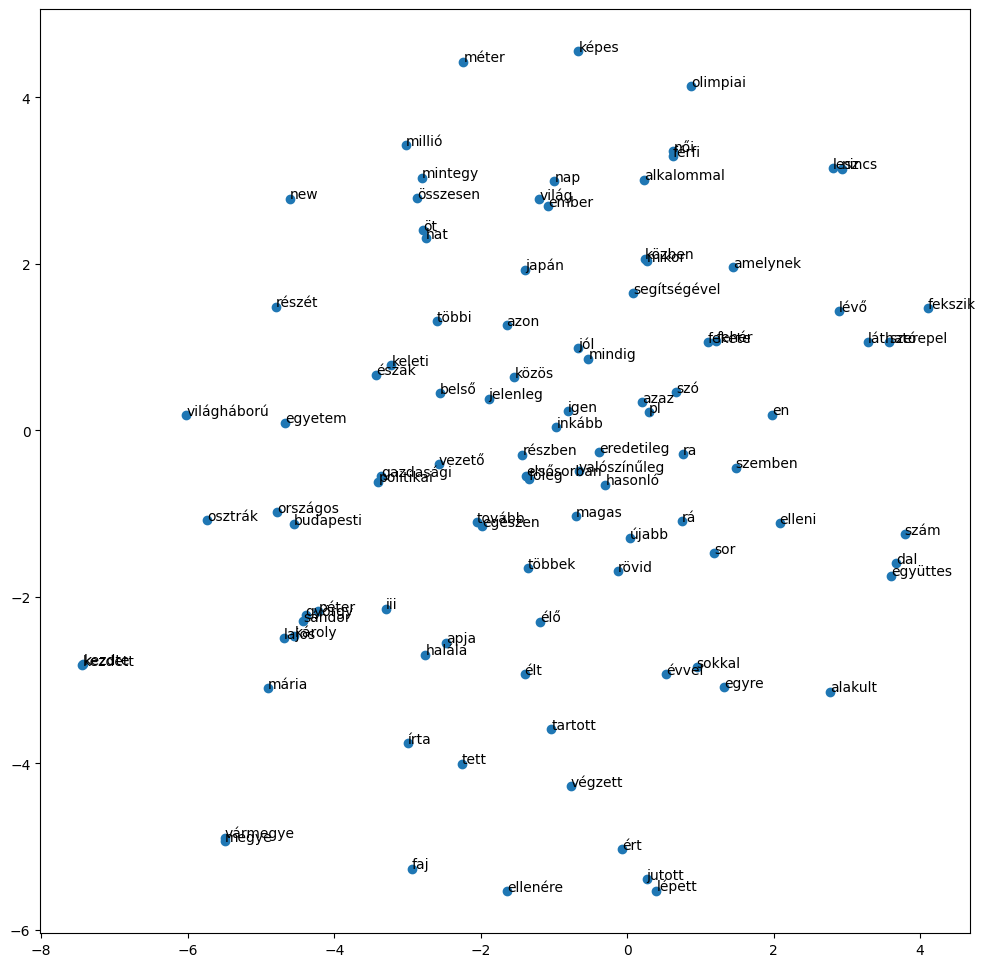

In [6]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model, start, end):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors[start:end])
    labels = np.asarray(model.wv.index_to_key[start:end])  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model, 300, 400)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    # selected_indices = random.sample(indices, 25)
    # for i in selected_indices:
    for i in indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

# try:
#     get_ipython()
# except Exception:
#     plot_function = plot_with_matplotlib
# else:
#     plot_function = plot_with_plotly

# plot_function(x_vals, y_vals, labels)
plot_with_matplotlib(x_vals, y_vals, labels)